# Data Analysis using Pandas


For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? 
* The detailed explanation of the logic of the analysis
**Question 2.** 
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
* Provide a complete list of all attributes used.

**Question 3.** 
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.

**Question 4.** 
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.


# Question 1
The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? (2 points)¶ passenger class 1 (the most expensive class) and female were most likely to survive the Titanic disaster.

The detailed explanation of the logic of the analysis (2 points) Passengers in the most expensive price class (Pclass=1) were more likely to survive because they were prioritized to be escaped and placed on lifeboats. Women had a 
much higher chance of survival than men because women were prioritized to be escaped and placed on lifeboats than men.

In [22]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [23]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from IPython.display import display

In [24]:
import pandas as pd
import numpy as np
import missingno
from collections import Counter

In [25]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
# quick overview about Sex 
df['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [29]:
#survival rate according to Sex
df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [30]:
# quick overview about Pclass 
df['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
#survival rate according to Pclass 
df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Question 2
What other attributes did you use for the analysis?
Age, SibSp, Parch, Fare, Embarked

Explain how you used them and why you decided to use them. Age: I used Age_Group (six age group) to see if minors had a better survival rate compared to adults. SibSp: I used groupby 'SibSp' with 'Survived' to see if passengers aboard the Titanic with siblings or spouses had a higher survival rate. Parch:I used groupby 'Parch' with 'Survived' to see if passengers traveling without any parents or children had a higher survival rate. Fare:I used groupby 'Fare' with 'Survived' to see if passengers paying more had a higher survival rate. Embarked:I used groupby 'Embarked' with 'Survived' I used to see if the port of embarkation had any effect on survival.

Provide a complete list of all attributes used.
Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,577,NaN,NaN,NaN,NaN,644
mean,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [49]:
import seaborn as sns

# Question 3

Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis? Yes, I created an Age_Group attribute to categorize passengers by age leading to make it easier to analyze a higher survival rate. 


If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.
I excluded PassengerId, Name, Ticket were not likely to impact on a surival chance while cabin had 687 null values. 

In [36]:
#create a new column storing discretinized age values (feature engineering)
bins = [10,20,30,40,50,60,9999]
bin_labels = ['Age Group of 10-19','20-29', '30-39', '40-49', '50-59', '>=60']
df["Age_Group"] = pd.cut(df["Age"], bins, right=False, labels = bin_labels) 
df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [37]:
df[:5][['Age','Age_Group']]

,Age,Age_Group
0,22.0,20-29
1,38.0,30-39
2,26.0,20-29
3,35.0,30-39
4,35.0,30-39


In [38]:
age_analysis = df.groupby("Age_Group")["Survived"].agg(["count", "mean", "min", "max"])
age_analysis

,count,mean,min,max
Age_Group,,,,
Age Group of 10-19,102,0.401961,0,1
20-29,220,0.350000,0,1
30-39,167,0.437126,0,1
40-49,89,0.382022,0,1
50-59,48,0.416667,0,1
>=60,26,0.269231,0,1


In [39]:
age_analysis = df.groupby(["Age_Group","Sex"])["Survived"].agg(["count", "mean", "sum"])
#multi-level groupby
age_analysis

count      mean  sum
Age_Group          Sex                         
Age Group of 10-19 female     45  0.755556   34
                   male       57  0.122807    7
20-29              female     72  0.722222   52
                   male      148  0.168919   25
30-39              female     60  0.833333   50
                   male      107  0.214953   23
40-49              female     32  0.687500   22
                   male       57  0.210526   12
50-59              female     18  0.888889   16
                   male       30  0.133333    4
>=60               female      4  1.000000    4
                   male       22  0.136364    3

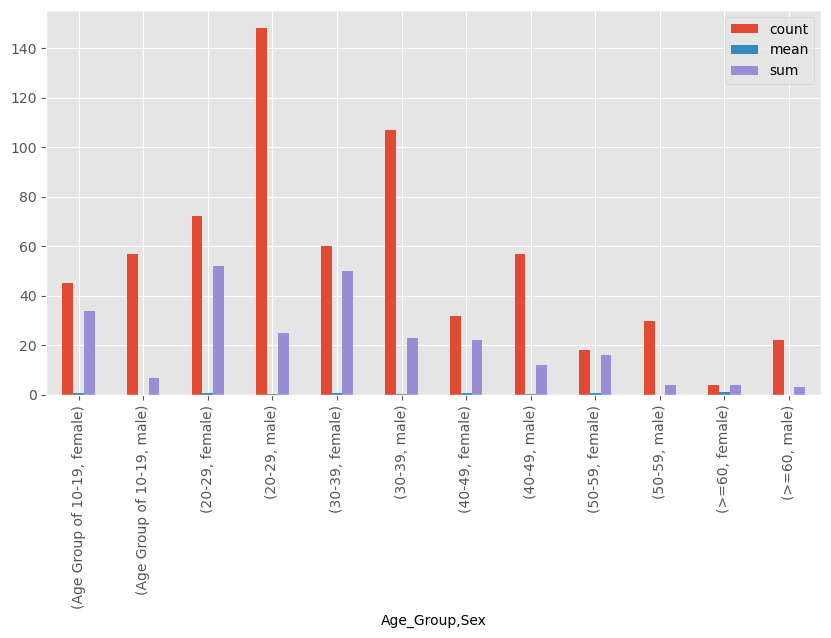

In [40]:
age_analysis.plot(kind='bar', figsize=(10,5));

# Question 4
How did you treat missing values for those attributes that you included in the analysis 
(for example, age attribute)? Provide a detailed explanation in the comments.

See below. 

In [42]:
# getting a quick overview of the DataFrame 
# age column has 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    652 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [91]:
df['Age'].isnull().sum()

177

In [43]:
#getting a quick overview of the size of the DataFrame,
#allowing me to know the number of rows is useful because I can identify how many rows to be removed after cleaning

print("df set shape: ", df.shape)

df set shape:  (891, 13)


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
df.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,652
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,6
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,20-29
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


In [52]:
#fill with Mmean 
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [53]:
#check the DataFrame again. Now, age column has no missing value. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    652 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [55]:
#Missing data in df set by columns
#age missing value no exist. 

df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age_Group      239
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Addtional my analysis thorugh data visualization 

Text(0.5, 1.0, 'Survival Probability by Gender')

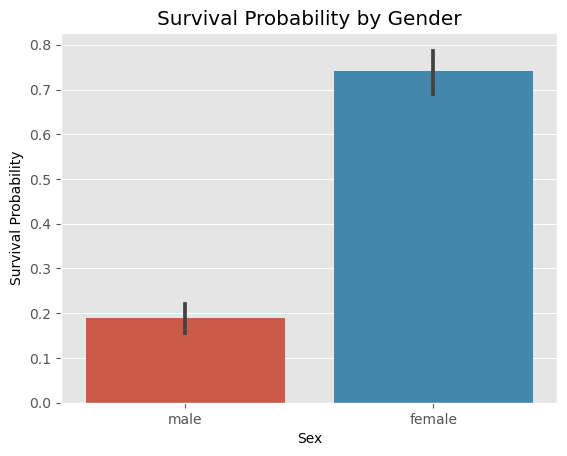

In [65]:
# female passengers are more likely to survive
# data visualization for analysis 
sns.barplot(x='Sex', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

Text(0.5, 1.0, 'Survival Probability by Passenger Class')

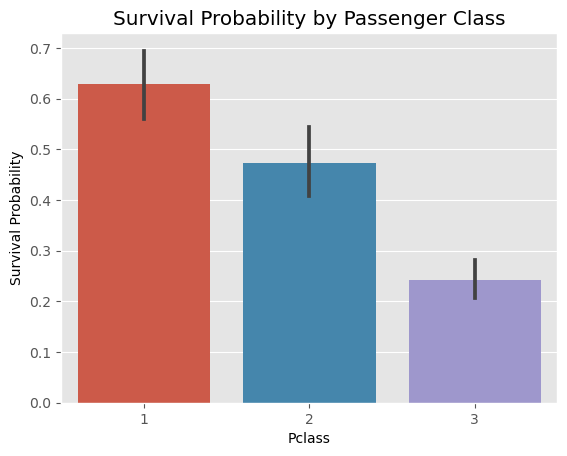

In [68]:
# survival probability by passenger class 
sns.barplot(x='Pclass', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

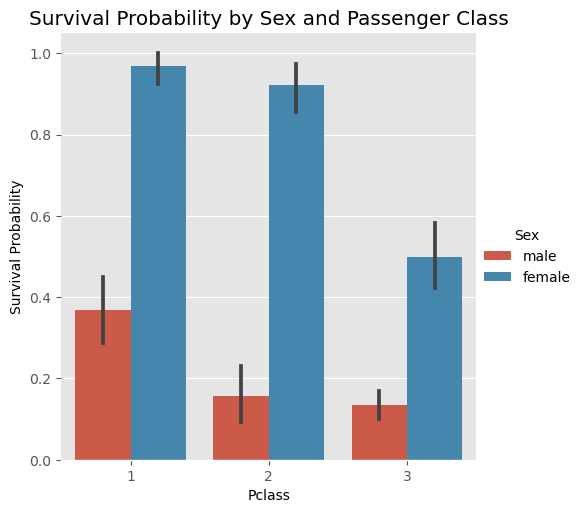

In [70]:
# Survival by gender and passenger class
t = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar')
t.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [71]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [72]:
df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

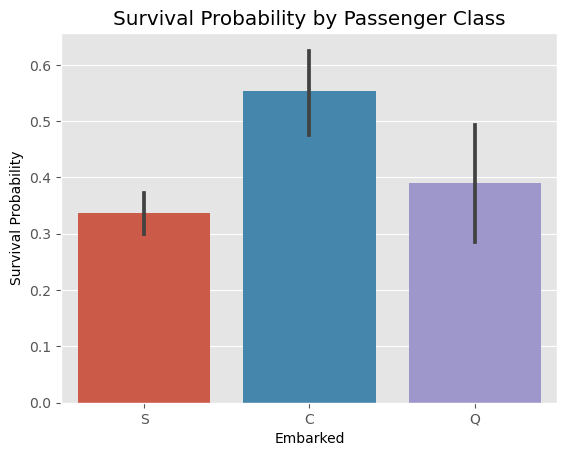

In [73]:
# Survival by port of embarkation
sns.barplot(x='Embarked', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

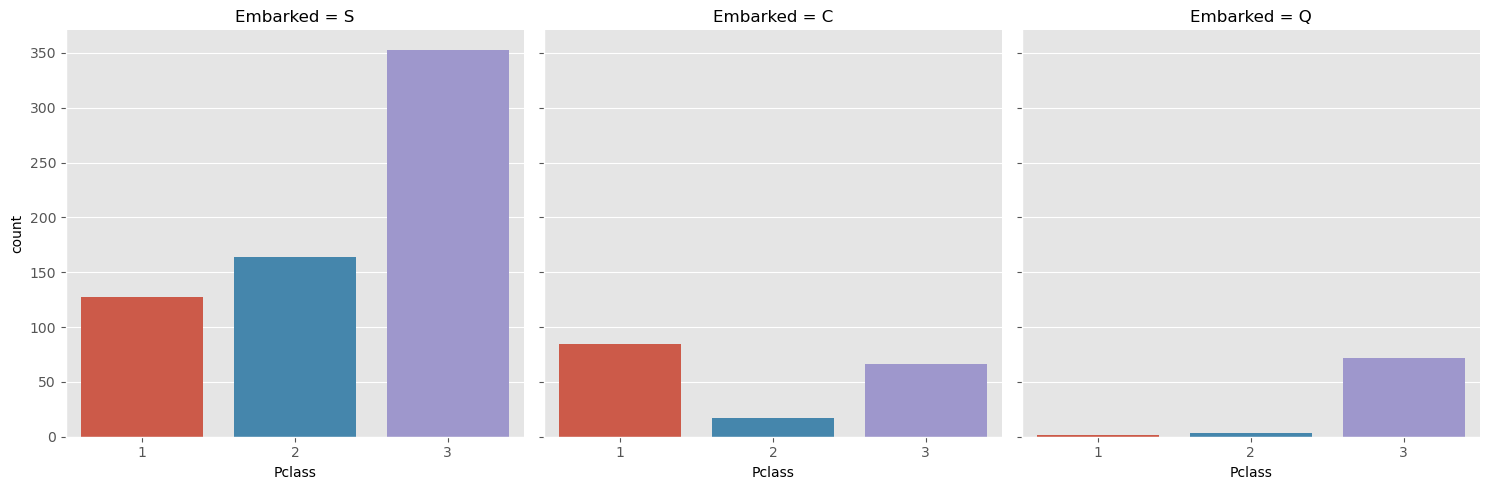

In [75]:
sns.catplot(x='Pclass', col='Embarked', data=df, kind='count')

In [87]:
df['SibSp'].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [88]:
df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

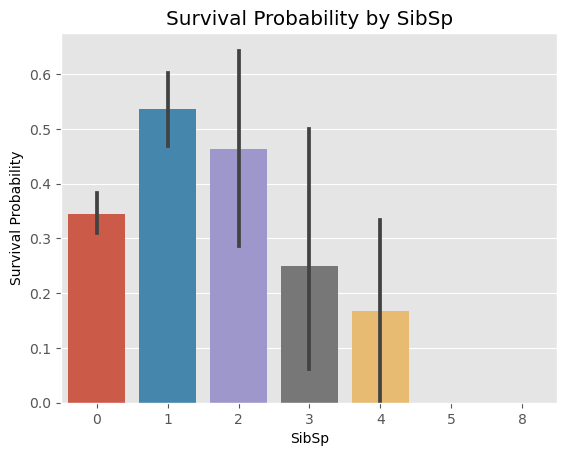

In [85]:
sns.barplot(x='SibSp', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [89]:
df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

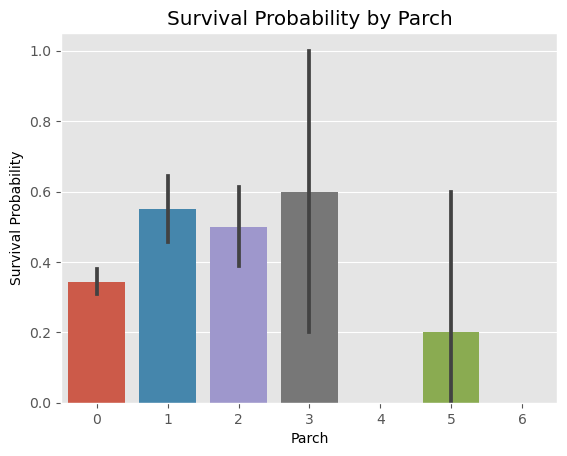

In [90]:
sns.barplot(x='Parch', y='Survived', data=df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

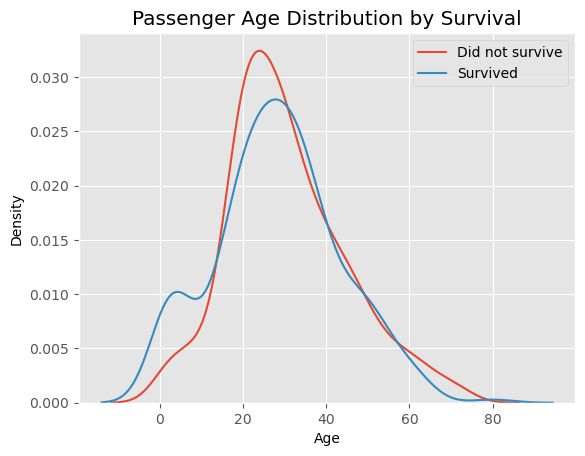

In [97]:
df = df.dropna(subset=['Age'])
sns.kdeplot(df['Age'][df['Survived'] == 0], label='Did not survive')
sns.kdeplot(df['Age'][df['Survived'] == 1], label='Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.legend()  
plt.show()

In [100]:
df['Fare'].isnull().sum()

0

In [102]:
# drop ticket and cabin features from df
df=df.drop(['Ticket', 'Cabin'], axis=1)


In [103]:
df.isnull().sum().sort_values(ascending=False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [105]:
mode=df['Embarked'].dropna().mode()[0]
mode

'S'

In [109]:
X_df=df.drop('Survived', axis=1)
Y_df=df['Survived']
print("X_df shape: ", X_df.shape)
print("Y_df shape: ", Y_df.shape)

X_df shape:  (714, 9)
Y_df shape:  (714,)
